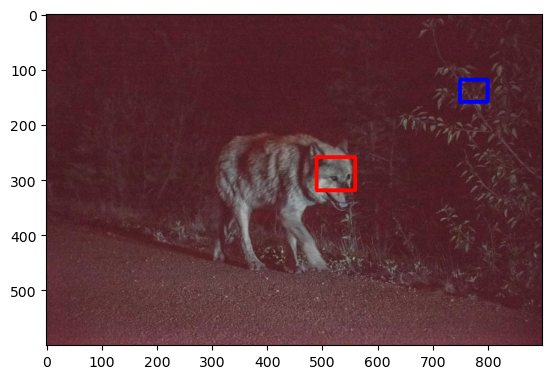

In [51]:
# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('../lobo.jpg')

window = cv2.rectangle(img.copy(), (750,120), (800,160), (0, 0, 255), 5)
window = cv2.rectangle(window, (490,260), (560,320), (255, 5, 0), 5)
plt.imshow(window, cmap='gray')
plt.show()

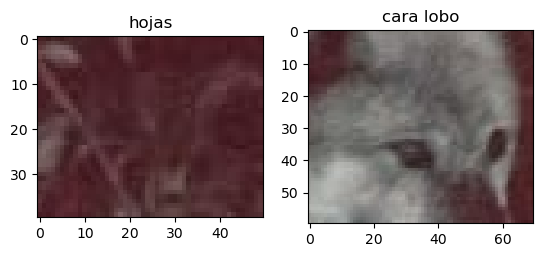

In [52]:
# Seleccionamos una región del cielo y una de la hierba
cielo = img[120:160, 750:800]
hierba = img[260:320, 490:560]

fig, ax = plt.subplots(1,2)
ax[0].imshow(cielo, cmap='gray')
ax[0].set_title('hojas')
ax[1].imshow(hierba, cmap='gray')
ax[1].set_title('cara lobo')
plt.show()

### MATRIZ DE COOCURRENCIA

In [46]:
#pip show scikit-image

In [47]:
#pip install --upgrade scikit-image

In [48]:
import skimage.feature
print(dir(skimage.feature))

['BRIEF', 'CENSURE', 'Cascade', 'ORB', 'SIFT', 'blob_dog', 'blob_doh', 'blob_log', 'canny', 'corner_fast', 'corner_foerstner', 'corner_harris', 'corner_kitchen_rosenfeld', 'corner_moravec', 'corner_orientations', 'corner_peaks', 'corner_shi_tomasi', 'corner_subpix', 'daisy', 'draw_haar_like_feature', 'draw_multiblock_lbp', 'fisher_vector', 'graycomatrix', 'graycoprops', 'haar_like_feature', 'haar_like_feature_coord', 'hessian_matrix', 'hessian_matrix_det', 'hessian_matrix_eigvals', 'hog', 'learn_gmm', 'local_binary_pattern', 'match_descriptors', 'match_template', 'multiblock_lbp', 'multiscale_basic_features', 'peak_local_max', 'plot_matches', 'shape_index', 'structure_tensor', 'structure_tensor_eigenvalues']


In [49]:
# MATRIZ DE COOCURRENCIA (Gray-Level Cooccurence Matrix - GLCM)
from tabulate import tabulate
#from skimage.feature import graycomatrix, graycoprops
from skimage.feature.texture import graycomatrix, graycoprops
headers = ['','cielo', 'hierba']
CN, DIS, H, ASM, E, COR = ['contraste'], ['disimilitud'], ['homogeneidad'], ['ASM'], ['Energía'], ['Correlación']

patches = []
patches.append(cielo)
patches.append(hierba)

for i in range(len(patches)): # a cada imagen
    image = cv2.cvtColor(patches[i], cv2.COLOR_BGR2GRAY) #convierto a escala de grises
    GLCM = graycomatrix(image, distances=[5], angles=[0], levels=np.max(image)+1, symmetric=True, normed=True)
    CN.append(graycoprops(GLCM, 'contrast')[0,0])
    DIS.append(graycoprops(GLCM, 'dissimilarity')[0,0])
    H.append(graycoprops(GLCM, 'homogeneity')[0,0])
    ASM.append(graycoprops(GLCM, 'ASM')[0,0])
    E.append(graycoprops(GLCM, 'energy')[0,0])
    COR.append(graycoprops(GLCM, 'correlation')[0,0])

my_data = [tuple(CN), tuple(DIS), tuple(H), tuple(ASM), tuple(E), tuple(COR)]

print(tabulate(my_data, headers=headers))

                    cielo          hierba
------------  -----------  --------------
contraste     12.7256      1207.41
disimilitud    2.62667       24.1079
homogeneidad   0.324213       0.0585451
ASM            0.00922022     0.000324063
Energía        0.096022       0.0180018
Correlación    0.441697       0.727517


### Patrones binarios Locales

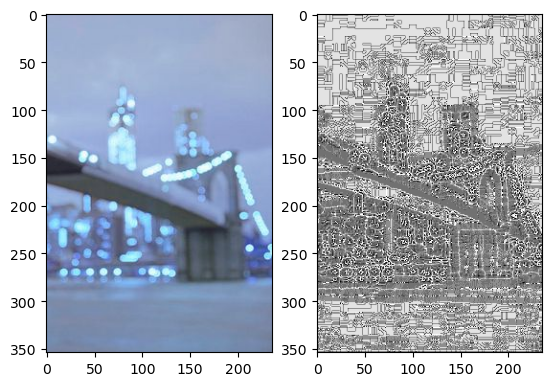

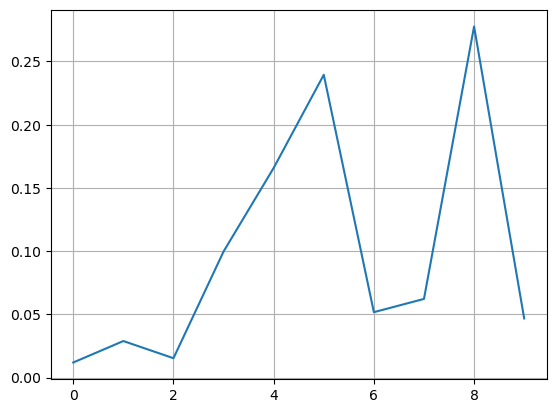

In [26]:
# LOCAL BINARY PATTERNS (LBP)
from skimage.feature import local_binary_pattern
img = cv2.imread('../puente.jpg')

# Definimos los parámetros iniciales
R = 1 # Radio
P = 8*R # Número de píxeles vecinos
epsilon = 1e-7 # Para normalizar el histograma

# Extraemos la imagen LBP
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp_image = local_binary_pattern(img_gray, P, R, method='uniform')
a,b = np.unique(lbp_image, return_counts=True)

# Calculamos el histograma
lbp_image = np.uint8(lbp_image)
hist = cv2.calcHist([lbp_image.ravel()], [0], None, [P+2], [0, P+2])

# Normalizamos el histograma
hist = hist.astype("float")
hist /= (hist.sum() + epsilon)

# Los P+2=10 bins del histograma serán los 10 atributos que nos permitirán caracterizar una imagen

# Visualizamos la imagen LBP
figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(lbp_image, cmap='gray')
plt.show()

# Visualizamos el histograma
plt.plot(hist)
plt.grid(True)
plt.show()

El histograma son las características a analizar. Las cuales se usan para los clasificadores y asociar esas caracteríticas a una clase u a la otra.

### La trasbformada de Chebishov

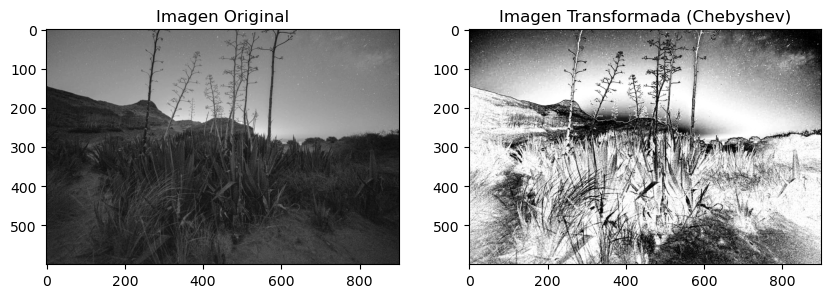

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.special import eval_chebyt

# Función para aplicar polinomios de Chebyshev a una imagen
def chebyshev_transform(image, degree=5):
    rows, cols = image.shape
    cheb_image = np.zeros_like(image, dtype=np.float64)
    
    # Aplicar polinomios de Chebyshev a cada fila
    for i in range(rows):
        for j in range(cols):
            cheb_image[i, j] = eval_chebyt(degree, image[i, j])
    
    return cheb_image

# Cargar imagen en escala de grises
image = cv2.imread('../desierto.jpg', cv2.IMREAD_GRAYSCALE)

# Normalizar la imagen para que los valores estén entre -1 y 1 (dominio de Chebyshev)
image_normalized = 2 * (image / 255.0) - 1

# Aplicar la transformada de Chebyshev
cheb_transformed_image = chebyshev_transform(image_normalized, degree=5)

# Mostrar la imagen original y la transformada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(cheb_transformed_image, cmap='gray')
plt.title('Imagen Transformada (Chebyshev)')

plt.show()

### Transformada Wavelet

In [19]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: PyWavelets in c:\users\ingma\appdata\local\programs\python\python39\lib\site-packages (1.4.1)



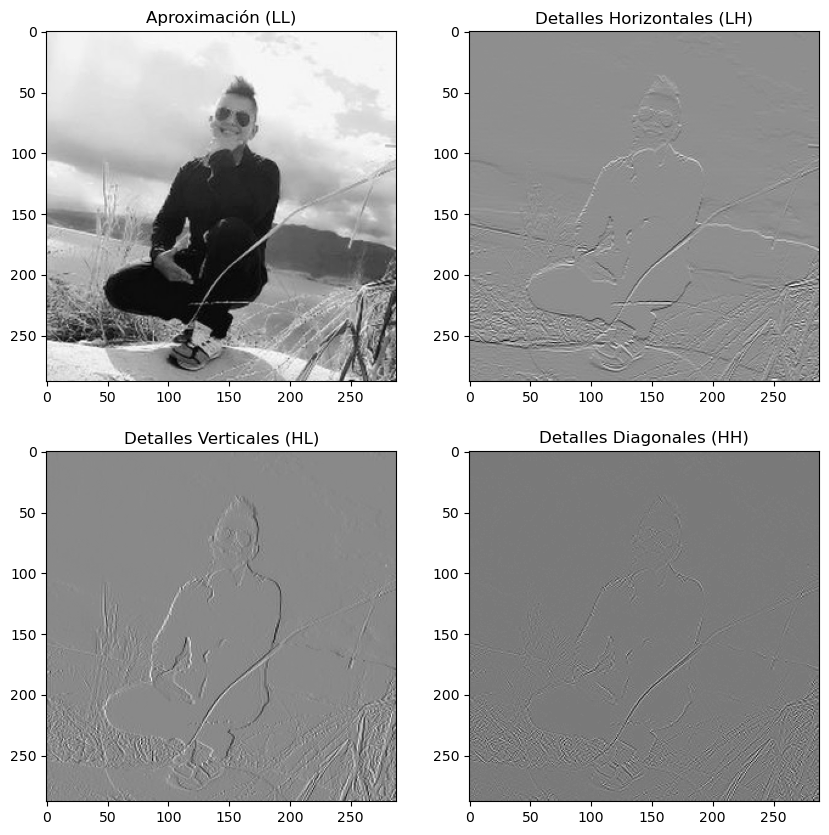

In [31]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt

# Función para realizar la Transformada Wavelet Discreta (DWT) a una imagen
def dwt_transform(image):
    # Aplicamos la DWT en la imagen usando la wavelet 'haar'
    coeffs2 = pywt.dwt2(image, 'haar')
    
    # Coeficientes de la descomposición: LL (aproximación), LH, HL, HH (detalles)
    LL, (LH, HL, HH) = coeffs2

    # Retornamos los coeficientes
    return LL, LH, HL, HH

# Cargar la imagen en escala de grises
image = cv2.imread('../perfil.jpg', cv2.IMREAD_GRAYSCALE)

# Verificamos si la imagen fue cargada correctamente
if image is None:
    raise ValueError("No se pudo cargar la imagen. Asegúrate de que el archivo exista.")

# Aplicar la Transformada Wavelet Discreta
LL, LH, HL, HH = dwt_transform(image)

# Mostrar las sub-bandas resultantes de la Transformada Wavelet
plt.figure(figsize=(10, 10))

# Sub-banda de aproximación LL (baja frecuencia)
plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Aproximación (LL)')

# Sub-banda de detalles horizontales LH (alta frecuencia horizontal)
plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Detalles Horizontales (LH)')

# Sub-banda de detalles verticales HL (alta frecuencia vertical)
plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Detalles Verticales (HL)')

# Sub-banda de detalles diagonales HH (alta frecuencia diagonal)
plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Detalles Diagonales (HH)')

# Mostrar la figura con las sub-bandas
plt.show()

1.	Aproximación (LL): Es la parte de la imagen de baja frecuencia, que contiene la mayoría de los detalles generales de la imagen (una versión "suavizada").
2.	Detalles horizontales (LH): Contiene las variaciones en las frecuencias altas en la dirección horizontal.
3.	Detalles verticales (HL): Contiene las variaciones en las frecuencias altas en la dirección vertical.
4.	Detalles diagonales (HH): Captura los detalles diagonales de alta frecuencia.

### Filtros de Gabor

In [21]:
pip install opencv-python

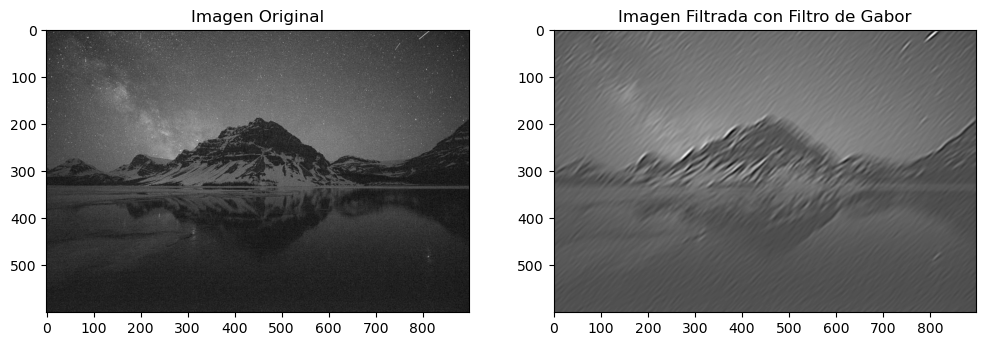

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para crear un filtro de Gabor
def create_gabor_filter(ksize, sigma, theta, lambd, gamma, psi):
    """
    Crea un kernel Gabor usando los parámetros dados.

    ksize: Tamaño del kernel (tupla).
    sigma: Desviación estándar de la Gaussiana.
    theta: Orientación del filtro Gabor en radianes.
    lambd: Longitud de onda de la función sinusoide.
    gamma: Factor de aspecto de la elipse.
    psi: Desfase de la onda sinusoidal.
    """
    return cv2.getGaborKernel(ksize=ksize, sigma=sigma, theta=theta, lambd=lambd, gamma=gamma, psi=psi, ktype=cv2.CV_64F)

# Cargar imagen en escala de grises
image = cv2.imread('../via lactea.jpg', cv2.IMREAD_GRAYSCALE)

# Verificamos si la imagen fue cargada correctamente
if image is None:
    raise ValueError("No se pudo cargar la imagen. Asegúrate de que el archivo exista.")

# Crear un filtro de Gabor con parámetros específicos
gabor_kernel = create_gabor_filter(ksize=(21, 21), sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0)

# Aplicar el filtro de Gabor a la imagen
filtered_image = cv2.filter2D(image, cv2.CV_64F, gabor_kernel)

# Mostrar la imagen original y la filtrada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada con Filtro de Gabor')

plt.show()

### Transformada SIFT (Scale-Invariant Feature Transform) - Transformada de Características Invariantes a Escala

(525, 128)


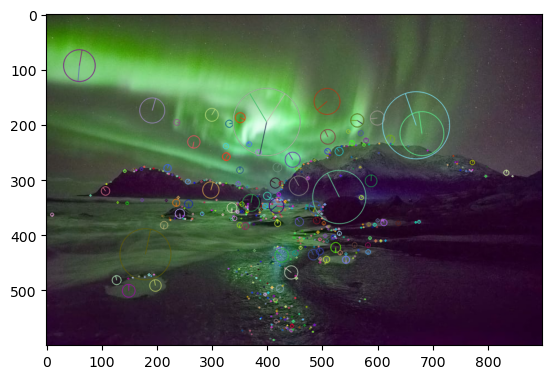

In [34]:
# SIFT algorithm
img = cv2.imread('../noise.jpg')

# Definición del algoritmo
sift = cv2.SIFT_create()

# Identificamos los puntos de interés
kp = sift.detect(img, None)

# Extraemos el descriptor para obtener el fingreprint
kp, des = sift.compute(img, kp)
print(np.shape(des))
# print(des) # Matriz donde las filas son los keypoints y las columnas las características de dichos puntos clave

# Visualizamos los puntos de interés
img=cv2.drawKeypoints(img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)
plt.show()

¿Cómo funciona el algoritmo SIFT?
SIFT realiza varias etapas para detectar y describir puntos clave en la imagen:

Detección de puntos clave: SIFT busca estructuras importantes (esquinas, bordes, etc.) en diferentes escalas utilizando una pirámide de imágenes (imágenes con diferentes niveles de suavizado).

Detección de extremos locales: SIFT identifica puntos clave encontrando extremos locales en la pirámide de diferencias de Gaussiana (DoG), es decir, puntos donde la imagen tiene cambios significativos en diferentes escalas.

Asignación de orientación: Cada punto clave recibe una orientación basada en el gradiente local de la imagen, lo que lo hace robusto a rotaciones.

Generación del descriptor: Para cada punto clave, se genera un descriptor basado en el histograma de gradientes en una región alrededor del punto clave. Este descriptor es invariante a escala, rotación y resistente a pequeños cambios de iluminación.

### Histogram of Oriented Gradients 

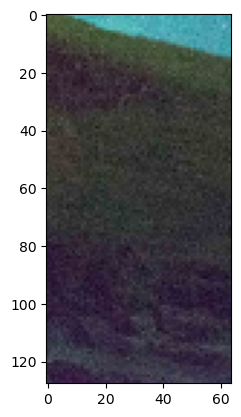

In [35]:
# HISTOGRAM OF ORIENTED GRADIENTS

# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
from skimage import io
img = io.imread('../paisaje.jpg')
img = np.float32(img/255)
crop = img[75:550,475:700]
crop = cv2.resize(crop, (64, 128))

plt.imshow(crop, cmap='gray')
plt.show()

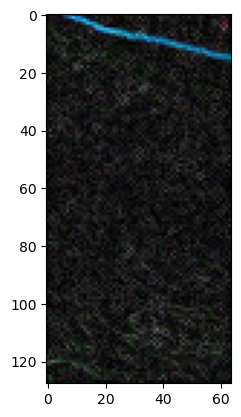

In [36]:
# Calculamos el gradiente con el kernel de Sobel
crop = np.float32(crop)
gx = cv2.Sobel(crop, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(crop, cv2.CV_32F, 0, 1, ksize=1)

# Calculamos la magnitud y la dirección del gradiente
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# Visualizamos la imagen obtenida en la magnitud del gradiente
mag = mag/np.max(mag)
plt.imshow(mag, cmap='gray')
plt.show()

In [37]:
# Cálculo del desriptor: Histogram of Oriented Gradients
from skimage.feature import hog
H = hog(crop, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
np.shape(H)

ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.